# Логистичко пресликување со шум

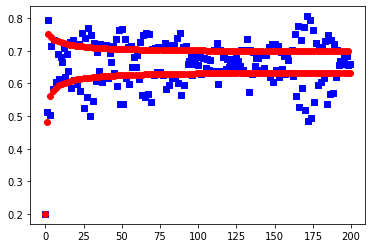

In [34]:
import numpy as np
import matplotlib.pyplot as plt

brIteracii = 200

Lambda = 3.01

Jachina = 0.02

x = np.zeros((brIteracii))
y = np.zeros((brIteracii))

x[0] = 0.2
y[0] = 0.2
for i in range(1,brIteracii):
    x[i] = Lambda * x[i - 1] * (1.0 - x[i - 1]) + np.random.normal(0, Jachina) # Gausov aditiven shum
    y[i] = Lambda * y[i - 1] * (1.0 - y[i - 1])
    
plt.plot(range(brIteracii), x,"bs")
plt.plot(range(brIteracii), y,"ro")
plt.show()  

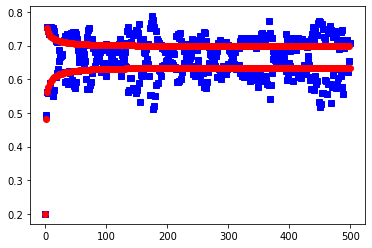

In [36]:
import numpy as np
import matplotlib.pyplot as plt

brIteracii = 500

Lambda = 3.01

Jachina = 0.02

x = np.zeros((brIteracii))
y = np.zeros((brIteracii))

x[0] = 0.2
y[0] = 0.2
for i in range(1,brIteracii):
    x[i] = Lambda * (1.0 +  np.random.normal(0, Jachina)) * x[i - 1] * (1.0 - x[i - 1]) # Multiplikativen shum
    y[i] = Lambda * y[i - 1] * (1.0 - y[i - 1])
    
plt.plot(range(brIteracii), x,"bs")
plt.plot(range(brIteracii), y,"ro")
plt.show()  

Анализа со помош на хистограм на можните вредности после некое преодно време

(array([250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 250.]),
 array([0.6328483 , 0.63950122, 0.64615415, 0.65280707, 0.65945999,
        0.66611291, 0.67276583, 0.67941875, 0.68607167, 0.6927246 ,
        0.69937752]),
 <a list of 10 Patch objects>)

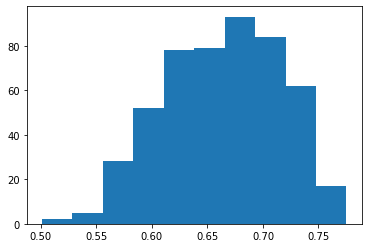

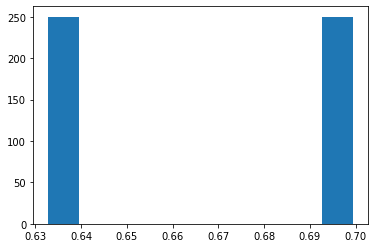

In [38]:
import numpy as np
import matplotlib.pyplot as plt

preodnoVreme = 500
brIteracii = 1000

Lambda = 3.01

Jachina = 0.02

x = np.zeros((brIteracii))
y = np.zeros((brIteracii))

x[0] = 0.2
y[0] = 0.2
for i in range(1, preodnoVreme):
    x[i] = Lambda * (1.0 +  np.random.normal(0, Jachina)) * x[i - 1] * (1.0 - x[i - 1]) # Multiplikativen shum
    y[i] = Lambda * y[i - 1] * (1.0 - y[i - 1])
    
for i in range(preodnoVreme, brIteracii):
    x[i] = Lambda * (1.0 +  np.random.normal(0, Jachina)) * x[i - 1] * (1.0 - x[i - 1]) # Multiplikativen shum
    y[i] = Lambda * y[i - 1] * (1.0 - y[i - 1])
    
xHist = x[preodnoVreme: brIteracii]
yHist = y[preodnoVreme: brIteracii]

plt.hist(xHist)
plt.figure()
plt.hist(yHist)


# Модел на национален доход (домашен производ) според Пол Семјуелсон 

Националниот доход за тримесечје е збир од потрошувачката на населението $C$, вложувањата на претпријатијата $I$ и потрошувачката на владата $G$, $M_t=C_t+I_t+G_t$. Според следните претпоставки:
1. Потрошувачката е пропорционална на доходот во претходното тромесечје $C_t = \alpha M_{t-1}$, каде што $\alpha$ е таканаречената маргинална склоност за трошење.
2. Вложувањата се пропорционални на порастот на потрошувачката $I_t = \beta(C_t-C_{t-1})$.
3. Владините трошоци се постојани $G_t=g$,

моделот може да се претстави во една диференцна равенка за националниот доход од втор ред $M_{t} = \alpha M_{t-1} + \alpha\beta(M_{t-1} - M_{t-2}) + g$. Јасно, може да се додаде и шум, кој што би ги опфатил бројните неодредености и разни надворешни влијанија и случајности.


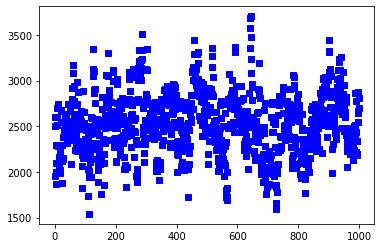

In [44]:
# BDP spored Samuelson

import numpy as np
import matplotlib.pyplot as plt

brIteracii = 1000

alfa = 0.8 # sklonost kon troshenje
beta = 0.2 # pottik za vlozhuvanje
g = 500 # spored modelot stabilna tochka e M = g / (1 - alfa)
Jachina = 200 # +- okolu 100 milioni evra vo tromesechje


M = np.zeros((brIteracii))
M[0] = 2500  # na pr. milijardi evra za Makedonija
M[1] = 2600

for i in range(2, brIteracii):
    M[i] = alfa * M[i - 1] + alfa * beta * (M[i-1] - M[i-2]) + g * (1.0 + 0.00001 * i) + np.random.normal(0, Jachina)

plt.plot(range(brIteracii), M,"bs")
plt.show()  